In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scikit_posthocs as sp # Import scikit_posthocs

from scipy import stats



from scipy.stats import f_oneway, shapiro, levene, kruskal
from statsmodels.stats.multicomp import pairwise_tukeyhsd

**ZADATAK 1.**

In [ ]:
file_path ='/content/glass.csv'

data = pd.read_csv(file_path)

print(data.info())

print("\n Null vrijednosti: \n ",data.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB
None

 Null vrijednosti: 
  RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64


In [ ]:
print(data.describe)

<bound method NDFrame.describe of           RI     Na    Mg    Al     Si     K    Ca    Ba   Fe  Type
0    1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.00  0.0     1
1    1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.00  0.0     1
2    1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.00  0.0     1
3    1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.00  0.0     1
4    1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.00  0.0     1
..       ...    ...   ...   ...    ...   ...   ...   ...  ...   ...
209  1.51623  14.14  0.00  2.88  72.61  0.08  9.18  1.06  0.0     7
210  1.51685  14.92  0.00  1.99  73.06  0.00  8.40  1.59  0.0     7
211  1.52065  14.36  0.00  2.02  73.42  0.00  8.44  1.64  0.0     7
212  1.51651  14.38  0.00  1.94  73.61  0.00  8.48  1.57  0.0     7
213  1.51711  14.23  0.00  2.08  73.36  0.00  8.62  1.67  0.0     7

[214 rows x 10 columns]>


Nema null vrijednosti. Postoje 10 varijabli od kojih su 9 tipa float, a 1 je tipa int64. U ovom datasetu postoje 214 vrijednosti.

Numeričke varijable su RI, Na, Mg,  Al, Si , K, Ca ,Ba i Fe, a kategorijska varijabla je Type.




**ZADATAK 2.**

In [ ]:
data_numerical = data.select_dtypes(include='float')
#print(data_numerical)
data_numerical.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000


Ri ima srednju vrijednost :1.518365 , standardnu devijaciju od : 0.003037 i min 1.511150 i max vrijednosti od :1.533930
Na ima srednju vrijednost : 13.407850, standardnu devijaciju od : 0.816604i min 10.730000 i max vrijednosti od :17.380000
Mg ima  srednju vrijednost : 2.684533 , standardnu devijaciju od 1.442408 : i min 0.000000  i max vrijednosti od : 4.490000
Al ima srednju vrijednost :1.444907 , standardnu devijaciju od 0.499270: i min  0.290000  i max vrijednosti od :3.500000  
Si ima srednju vrijednost :72.650935 , standardnu devijaciju od :  0.774546 i min 69.810000 i max vrijednosti od :75.410000
K ima srednju vrijednost : 0.497056  , standardnu devijaciju od : 0.652192 i min 0.000000   i max vrijednosti od :  6.210000  
Ca ima srednju vrijednost :8.956963  , standardnu devijaciju od :1.423153   i min 5.430000  i max vrijednosti od :16.190000
Ba ima srednju vrijednost :0.175047 , standardnu devijaciju od : 0.497219 i min 0.000000  i max vrijednosti od :3.150000
Fe ima srednju vrijednost :0.057009  , standardnu devijaciju od :0.097439 i min 0.000000  i max vrijednosti od : 0.510000

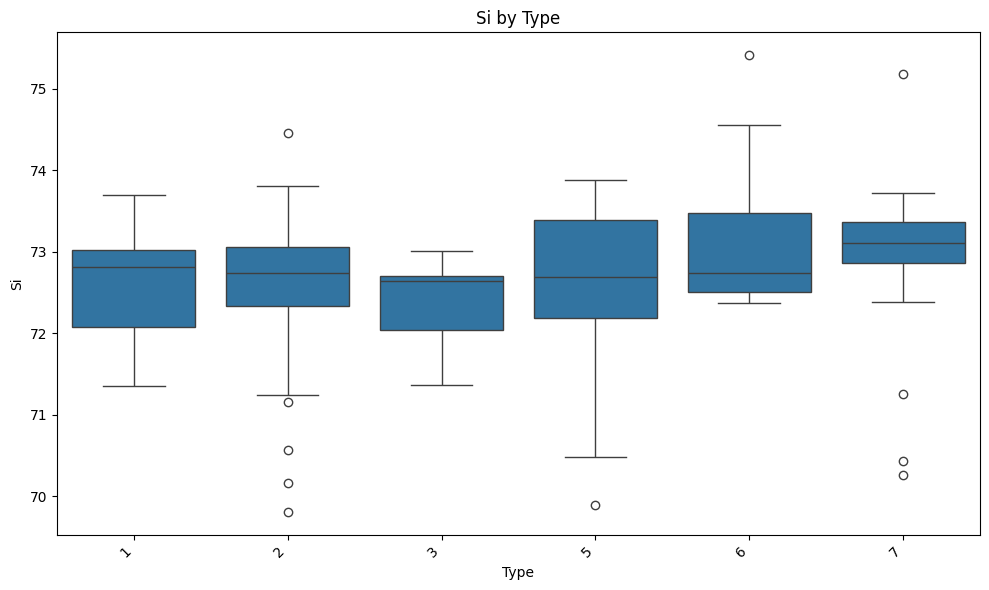

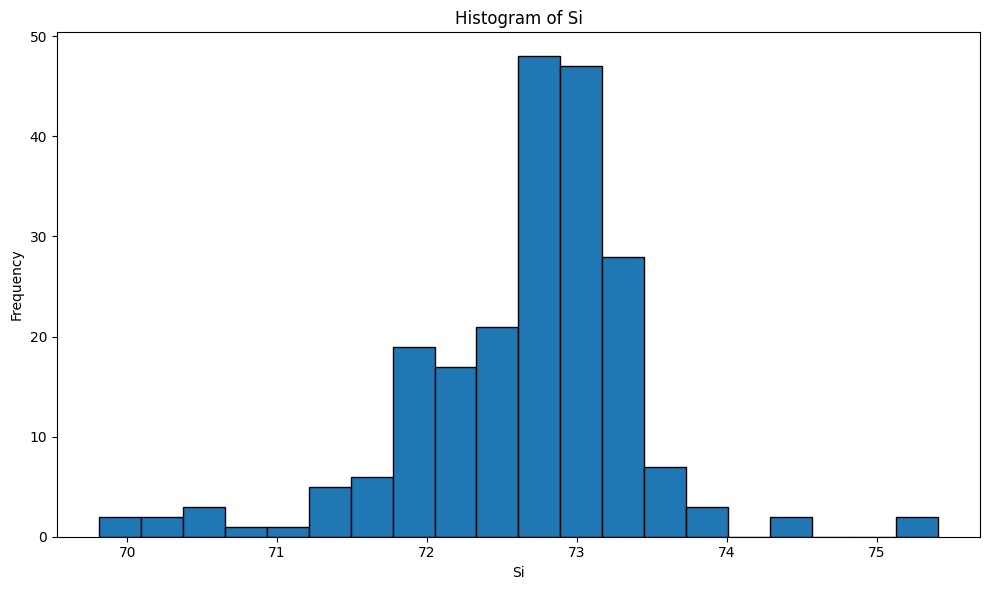

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Type', y='Si', data=data)
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
plt.title('Si by Type')
plt.xlabel('Type')
plt.ylabel('Si')
plt.tight_layout()
plt.show()


plt.figure(figsize=(10, 6))
plt.hist(data['Si'], bins=20, edgecolor='k')
plt.title('Histogram of Si')
plt.xlabel('Si')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

Iz boxplot dijagrama vidimo da postoje outlieri za 2, 5 ,6 i 7 type. Za type 5 i 6 postoji samo jedn outlier, a za 2 i 7 type postoje više outlira. Većina outlira su manji od minimuma.

Iz histogram za zavisnu varijablu Si vidimo da razdioba nije do kraja normalno distribuirana tj. imamo više podataka lijevo koji su manji od posječne vrijednosti nego koji su veći od prosječne vrijednosti.

**ZADATAK 3.**

In [48]:
groups = [
data[data['Type'] == q]['Si']
for q in data['Type'].unique()
]

for quality in data['Type'].unique():
  print(quality)

for i, group in enumerate(groups):
  stat, p = shapiro(group)
  print(f"Grupa {i+1}: p-vrijednost = {p}")

1
2
3
5
6
7
Grupa 1: p-vrijednost = 0.00011706077898616211
Grupa 2: p-vrijednost = 3.7537972858364177e-06
Grupa 3: p-vrijednost = 0.04424933903906387
Grupa 4: p-vrijednost = 0.13436836170677618
Grupa 5: p-vrijednost = 0.011949689777580064
Grupa 6: p-vrijednost = 3.1655457615369326e-05


Samo jedna grupa ima ima veću vrijednost od 0.05 , stoga za taj Type ne odbacujemo pretpostavku normalnosti razdiobe, dok za druge grupe odbacujemo pretpostavku normalnosti razdiobe.

In [ ]:
stat, p = levene(*groups)
print(f"Levene test p-vrijednost = {p}")

Levene test p-vrijednost = 0.058012662289472536


Budući da je p-vrijednost Leveneovog testa veća od α = 0.05, pretpostavka homogenosti varijanci smatra se zadovoljenom.

Zbog toga što je homogenost zadovoljena po levene testu ne koristimo Welch-ANOVA test, nego koristimo Kruskal-Wallis test jer  nam podaci nisu normalno distribuirani.

**ZADATAK 4.**

In [ ]:
stats, p= kruskal(*groups)
print(f"Kruskal-Wallis test p-vrijednost = {p}")
print(stats)

Kruskal-Wallis test p-vrijednost = 0.001473463412425883
19.618334164868823


P vrijednost je manja od 0.05 što znaći da se odbacuje H0 o jednakosti srednjih vrijednosti.

U ovom slučaju zaključuje se da postoji statistički značajna razlika
između barem dvije skupine.


In [32]:
pip install scikit-posthocs

**ZADATAK 5.**

In [55]:
dunn_result = sp.posthoc_dunn(groups, p_adjust='bonferroni')
print(dunn_result)

         1         2         3         4         5         6
1  1.00000  1.000000  1.000000  1.000000  1.000000  0.009770
2  1.00000  1.000000  1.000000  1.000000  1.000000  0.007168
3  1.00000  1.000000  1.000000  1.000000  0.839537  0.001247
4  1.00000  1.000000  1.000000  1.000000  1.000000  0.381021
5  1.00000  1.000000  0.839537  1.000000  1.000000  1.000000
6  0.00977  0.007168  0.001247  0.381021  1.000000  1.000000


Postoje statističk značajne razlike u srednjim vrijednostima između Type 1 ( building_windows_float_processed)i 7(headlamps), 2 (building_windows_non_float_processed) i 7 (headlamps) i 3 (vehicle_windows_float_processed) i 7 (headlamps)

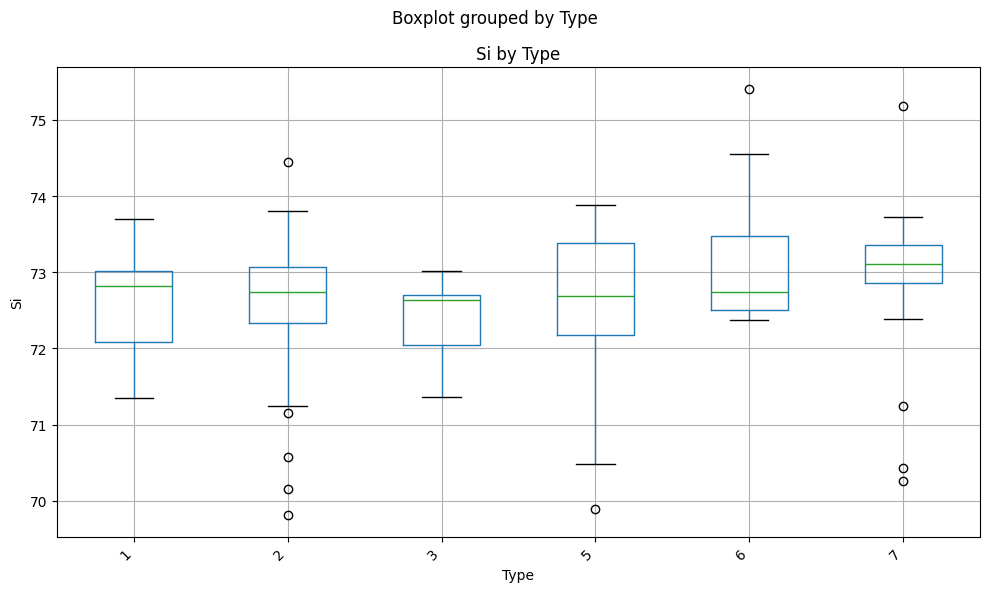

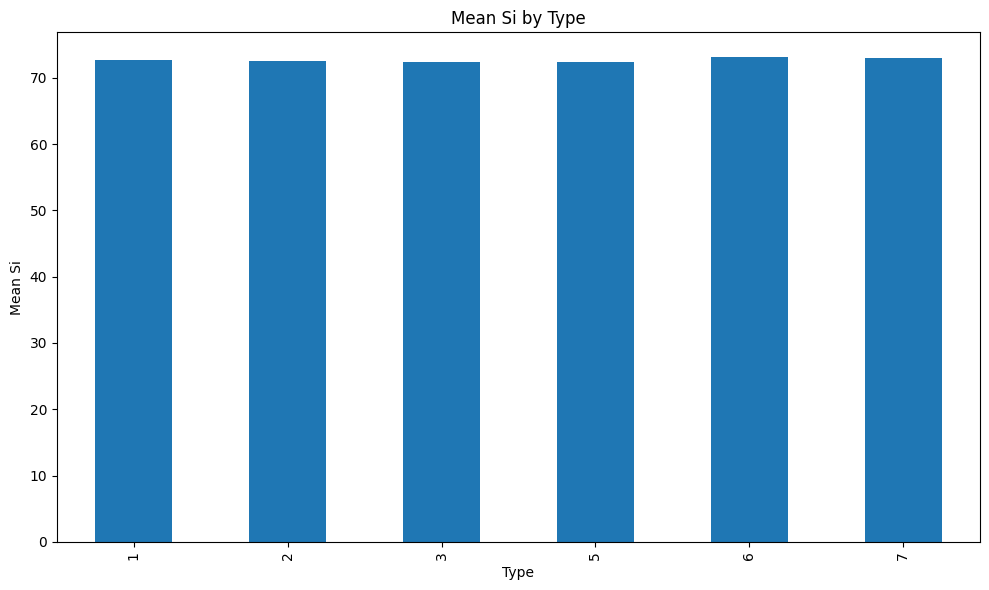

In [40]:
boxplot = data.boxplot(column='Si', by='Type', figsize=(10, 6))
plt.xticks(rotation=45, ha='right')
plt.title('Si by Type')
plt.xlabel('Type')
plt.ylabel('Si')
plt.tight_layout()
plt.show()


barplot = data.groupby('Type')['Si'].mean().plot(kind='bar', figsize=(10, 6))
plt.title('Mean Si by Type')
plt.xlabel('Type')
plt.ylabel('Mean Si')
plt.tight_layout()

In [41]:
data.groupby('Type')['Si'].mean()

,Si
Type,
1,72.619143
2,72.598026
3,72.404706
5,72.366154
6,73.206667
7,72.965862


Razlike između srednjih vrijednosti su male pa se zato slabije vide razlike na stupčastom dijagramu.

In [47]:
n=data['Si'].count()
standardna_devijacija=np.std(data['Si'],ddof=0)
razina_pouzdanosti=0.99
alfa = 1 - razina_pouzdanosti
t_vrijednost = stats.t.ppf(1 - alfa / 2, df=n-1) # Kritična vrijednost t-distribucije za zadani stupanj slobode
# Izračun margine pogreške
margina_pogreske = t_vrijednost * (standardna_devijacija / np.sqrt(n-1))
# Interval povjerenja
srednja_vrijednost=data['Si'].mean()
donja_granica = srednja_vrijednost - margina_pogreske
gornja_granica = srednja_vrijednost + margina_pogreske
print(f"99% interval povjerenja: ({donja_granica:.2f},{gornja_granica:.2f})")

99% interval povjerenja: (72.51,72.79)


99% interval povjerenja za srednju vrijednosti varijable Si za cijelu populaciju : (72.51,72.79)

**ZADATAK 6. ZAKLJUČAK**



Nema null vrijednosti. Postoje 10 varijabli od kojih su 9 tipa float, a 1 je tipa int64. U ovom datasetu postoje 214 vrijednosti.

Numeričke varijable su RI, Na, Mg, Al, Si , K, Ca ,Ba i Fe, a kategorijska varijabla je Type.


Postoje statističk značajne razlike u srednjim vrijednostima između Type 1 ( building_windows_float_processed)i 7(headlamps), 2 (building_windows_non_float_processed) i 7 (headlamps) i 3 (vehicle_windows_float_processed) i 7 (headlamps), za zavisnu varijablu Si.



99% interval povjerenja za zavisnu varijablu Si : (72.51,72.79)

Iz boxplot dijagrama vidimo da postoje outlieri za 2, 5 ,6 i 7 type. Za type 5 i 6 postoji samo jedn outlier, a za 2 i 7 type postoje više outlira. Većina outlira su manji od minimuma.
